In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [401]:
df = pd.read_csv('/Users/yuchenzhang/Desktop/MBAN 6110/Dataset/midterm_data.csv')

In [402]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [404]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


Since the mean and median are simlier for age, sessions, time spend, and cart_items, means that those are the normal distribution. 

## Data Cleaning

In [405]:
null = df[df['device'].isnull() & df['location'].isnull()]
null

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


In [406]:
# let's drop both device and location are null
df.drop(null.index, axis=0, inplace=True)

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4999 non-null   int64  
 1   age              4999 non-null   int64  
 2   sessions         4999 non-null   int64  
 3   time_spent       4999 non-null   float64
 4   pages_visited    4999 non-null   int64  
 5   cart_items       4999 non-null   int64  
 6   cart_value       4999 non-null   float64
 7   checkout_status  4999 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.6+ KB


In [408]:
df_test =df.copy()
df_test_2 = df.copy()

In [409]:
df_test['device'] =df_test['device'].fillna('Other')

Since desktop and location 4 are the most in the data. so we could use them or other. let's do analysis first.

In [410]:
df_test.groupby('device').describe()

userID                                                             
          count         mean          std   min      25%     50%      75%   
device                                                                      
Desktop  2538.0  2481.464933  1435.264432   1.0  1260.25  2497.5  3733.75  \
Mobile   1428.0  2518.448880  1457.420581   7.0  1236.75  2512.5  3807.75   
Other      99.0  2411.656566  1386.399927  80.0  1226.00  2379.0  3541.50   
Tablet    934.0  2534.595289  1452.234322   5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Other    4988.0    99.0  41.282828  ...   191.7000  302.48            99.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Other    0.222222  0.417855  0.0  0.0  0.0  0.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[4 rows x 64 columns]

In [411]:
df_test_2['device'] = df_test_2['device'].fillna('Desktop')
df_test_2.groupby('device').describe()

userID                                                            
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2637.0  2478.844141  1433.266427  1.0  1259.00  2495.0  3721.00  \
Mobile   1428.0  2518.448880  1457.420581  7.0  1236.75  2512.5  3807.75   
Tablet    934.0  2534.595289  1452.234322  5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2637.0  41.336746  ...   196.9500  427.40          2637.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.282897  0.450492  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

If we assign these values to Desktop, looks better. The mean and median did not changed a lot. looks better if we create a new 'other' catagory.

In [412]:

df['device'] = df['device'].fillna('Desktop')

Let's do same for location

In [413]:
df_test['location'] = df_test['location'].fillna('other')
df_test_2['location'] = df_test_2['location'].fillna('Location 4')

In [414]:
df_test.groupby('location').describe()

userID                                                            
             count         mean          std   min      25%     50%     75%   
location                                                                      
Location 1   979.0  2428.888662  1460.439111   1.0  1115.00  2431.0  3683.5  \
Location 2   950.0  2495.070526  1413.792983   4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060   2.0  1248.25  2378.5  3712.5   
Location 4  1056.0  2508.631629  1470.328379   3.0  1219.50  2517.5  3796.0   
Location 5   971.0  2598.049434  1434.875326   6.0  1352.50  2664.0  3849.0   
other         29.0  2354.379310  1310.371523  60.0  1460.00  2352.0  3325.0   

                       age             ... cart_value         checkout_status   
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0  \
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1056.0  40.892992  ...   199.5425  353.80          1056.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   
other       4951.0    29.0  44.034483  ...   195.4400  237.64            29.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.284091  0.451194  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  
other       0.275862  0.454859  0.0  0.0  0.0  1.0  1.0  

[6 rows x 64 columns]

In [415]:
df_test_2.groupby('location').describe()

userID                                                           
             count         mean          std  min      25%     50%     75%   
location                                                                     
Location 1   979.0  2428.888662  1460.439111  1.0  1115.00  2431.0  3683.5  \
Location 2   950.0  2495.070526  1413.792983  4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060  2.0  1248.25  2378.5  3712.5   
Location 4  1085.0  2504.508756  1465.947354  3.0  1221.00  2514.0  3783.0   
Location 5   971.0  2598.049434  1434.875326  6.0  1352.50  2664.0  3849.0   

                       age             ... cart_value         checkout_status   
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0  \
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1085.0  40.976959  ...   199.4300  353.80          1085.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.283871  0.451083  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  

[5 rows x 64 columns]

Put thoses data on location 4 looks better since mean and median did not change a lot. if we put in other, it create a new catagory but only with 29 number.  

In [416]:
df['location'] = df['location'].fillna('Location 4')

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4999 non-null   int64  
 1   age              4999 non-null   int64  
 2   sessions         4999 non-null   int64  
 3   time_spent       4999 non-null   float64
 4   pages_visited    4999 non-null   int64  
 5   cart_items       4999 non-null   int64  
 6   cart_value       4999 non-null   float64
 7   checkout_status  4999 non-null   int64  
 8   device           4999 non-null   object 
 9   location         4999 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.6+ KB


now, check for the outliers!

<Axes: ylabel='time_spent'>

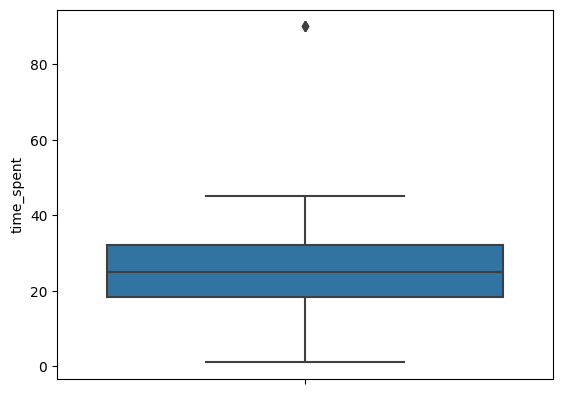

In [418]:
sns.boxplot(data = df, y = 'time_spent')


In [419]:
df['time_spent'].sort_values(ascending=False).head(20)

2494    90.0
3957    90.0
284     90.0
2833    90.0
1276    45.0
890     45.0
92      45.0
3141    45.0
2621    45.0
3139    45.0
3590    45.0
4422    45.0
2628    45.0
3685    45.0
907     45.0
461     45.0
102     45.0
2635    45.0
217     45.0
1329    45.0
Name: time_spent, dtype: float64

In [420]:
df['time_spent'].sort_values(ascending=True).head(20)

904     1.0
4157    1.0
714     1.0
3244    1.0
3874    1.0
203     1.0
3535    5.0
3353    5.0
281     5.0
3531    5.0
2450    5.0
3142    5.0
1782    5.0
438     5.0
4538    5.0
4540    5.0
53      5.0
4475    5.0
3548    5.0
3352    5.0
Name: time_spent, dtype: float64

In [421]:
drop_unit_outliers = df[df['time_spent'] >= 45].index
drop_unit_outliers

Index([  13,   29,   52,   92,  102,  217,  259,  284,  305,  347,
       ...
       4886, 4890, 4932, 4947, 4955, 4960, 4963, 4990, 4995, 4998],
      dtype='int64', length=116)

In [422]:
df.drop(drop_unit_outliers, inplace=True)

<Axes: ylabel='pages_visited'>

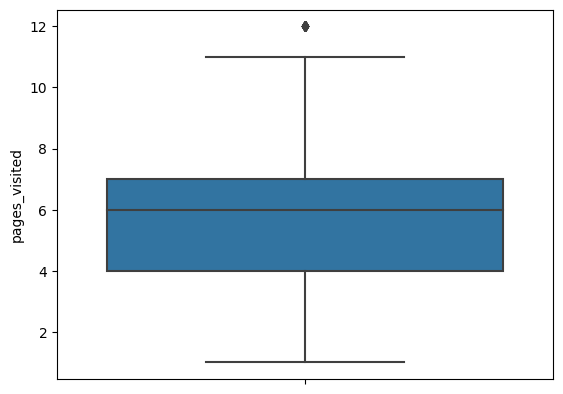

In [423]:
sns.boxplot(data = df, y = 'pages_visited')


<Axes: ylabel='cart_items'>

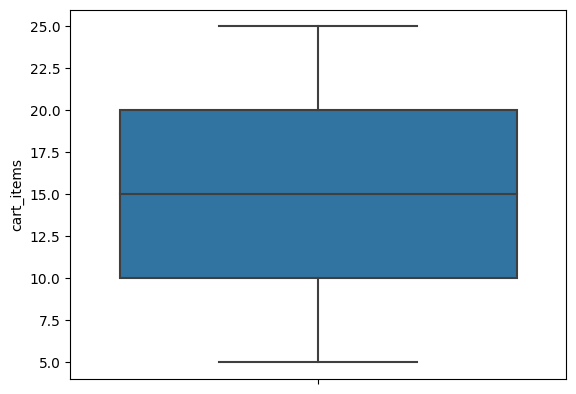

In [424]:
sns.boxplot(data = df, y = 'cart_items')


<Axes: ylabel='cart_value'>

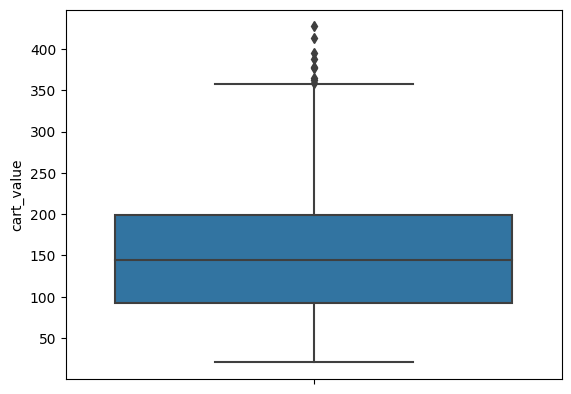

In [425]:
sns.boxplot(data = df, y = 'cart_value')

In [426]:
df['cart_value'].sort_values(ascending=False).head(20)

3200    427.40
2769    413.11
2664    394.77
445     387.98
1268    377.98
263     377.54
2615    365.38
1479    362.37
604     359.00
964     357.77
166     356.50
301     354.05
4557    353.80
1228    353.35
1488    346.81
1757    345.23
906     344.84
279     344.60
1483    344.48
2542    344.43
Name: cart_value, dtype: float64

Since the mean is only 150, i decided drop those value over 350 as boxplot show.

In [427]:
drop_unit_outliers = df[df['cart_value'] >= 350].index
drop_unit_outliers

Index([166, 263, 301, 445, 604, 964, 1228, 1268, 1479, 2615, 2664, 2769, 3200,
       4557],
      dtype='int64')

In [428]:
df.drop(drop_unit_outliers, inplace=True)

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4869 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4869 non-null   int64  
 1   age              4869 non-null   int64  
 2   sessions         4869 non-null   int64  
 3   time_spent       4869 non-null   float64
 4   pages_visited    4869 non-null   int64  
 5   cart_items       4869 non-null   int64  
 6   cart_value       4869 non-null   float64
 7   checkout_status  4869 non-null   int64  
 8   device           4869 non-null   object 
 9   location         4869 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 418.4+ KB


Now, data cleaning is finished with 4981 data! 

## Data Exploration


<Axes: xlabel='time_spent', ylabel='Count'>

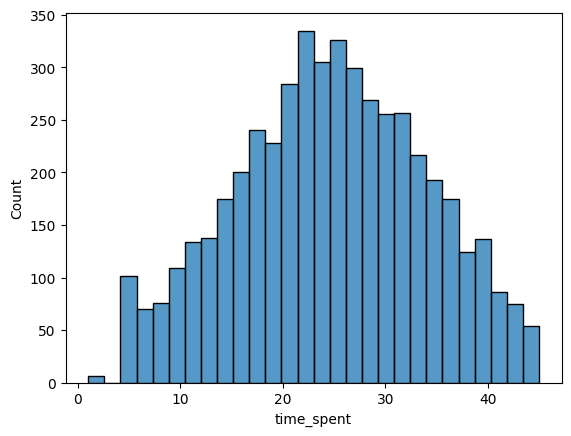

In [430]:
# The time_spent is normal distribution
sns.histplot(df['time_spent'])

<Axes: xlabel='pages_visited', ylabel='Count'>

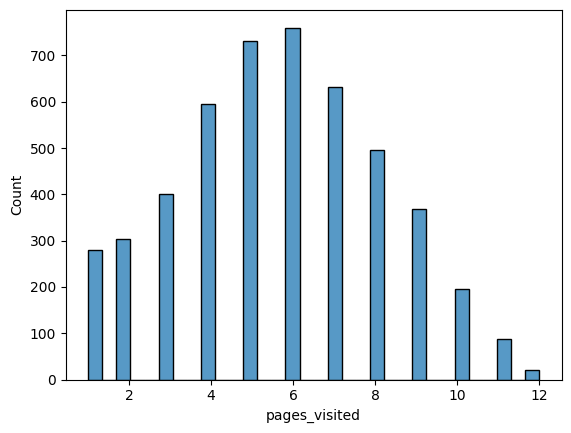

In [431]:
sns.histplot(df['pages_visited'])

<Axes: xlabel='cart_items', ylabel='Count'>

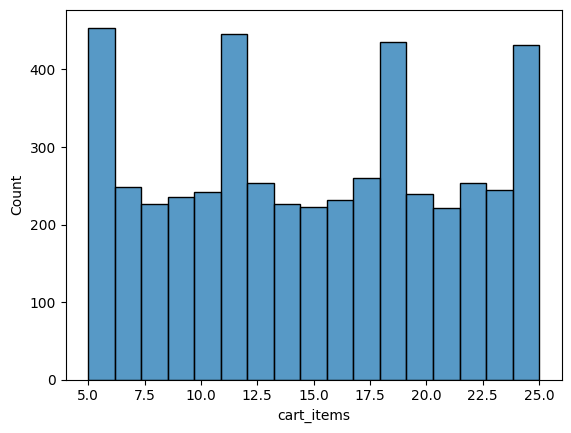

In [432]:
sns.histplot(df['cart_items'])


In [433]:
print(stats.skew(df['cart_items']))
print(stats.kurtosis(df['cart_items']))

0.004424364009821648
-1.2038046361306707


Skew is very small, but kurtosis is -1.20。The data has fewer extreme values (very large) than the normal distribution, and the data tends to be more evenly distributed

<Axes: xlabel='cart_value', ylabel='Count'>

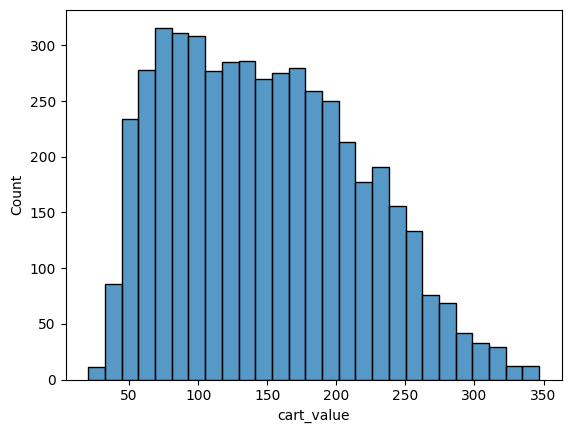

In [434]:
sns.histplot(df['cart_value'])

In [435]:
print(stats.skew(df['cart_value']))
print(stats.kurtosis(df['cart_value']))

0.3794198991562905
-0.6504683551724617


The skew is left means most people purchaase cheap items, and kurtosis is -0.64, means fewer extermely value.

In [436]:
df

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4993,4994,42,1,21.218768,5,13,120.59,0,Desktop,Location 5
4994,4995,33,4,29.762098,9,20,185.60,1,Desktop,Location 1
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4


<Axes: xlabel='device'>

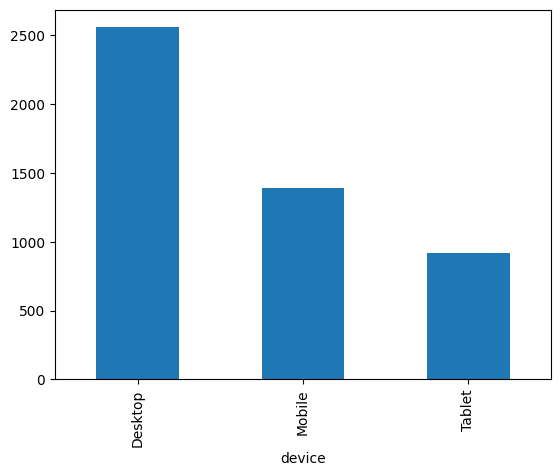

In [437]:
df.groupby('device')['time_spent'].count().sort_values(ascending=False).plot(kind='bar')


<Axes: xlabel='device'>

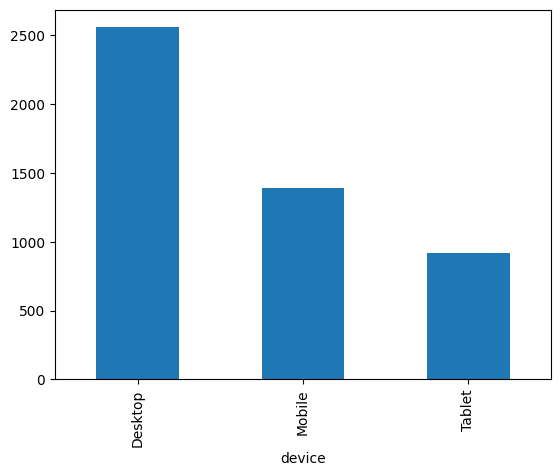

In [438]:
df.groupby('device')['pages_visited'].count().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='device'>

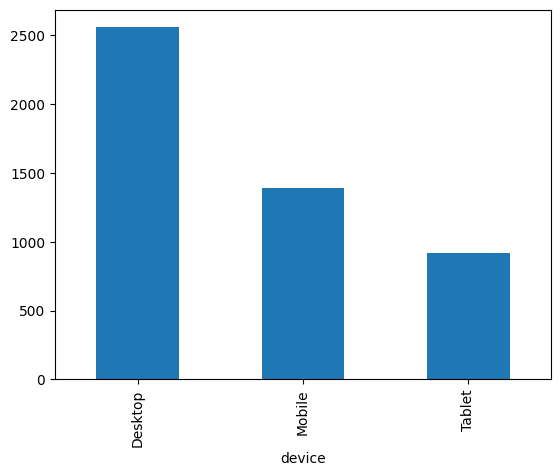

In [439]:

df.groupby('device')['cart_items'].count().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='device'>

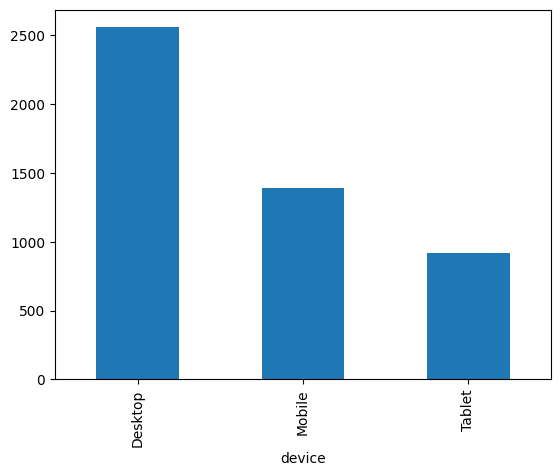

In [440]:
df.groupby('device')['cart_value'].count().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='device'>

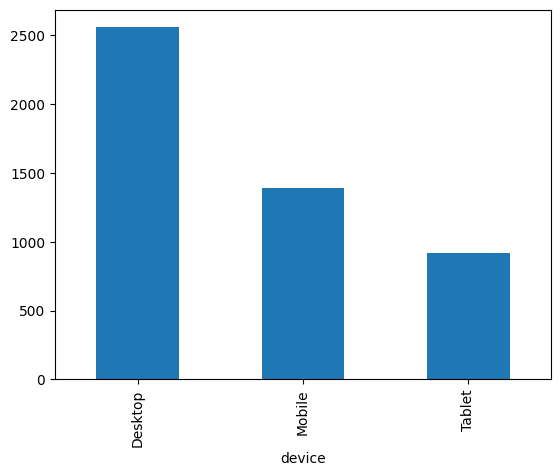

In [441]:
df.groupby('device')['checkout_status'].count().sort_values(ascending=False).plot(kind='bar')

Based on those analysis, we find people with desktop are highly to buy the prodcut. with tablet are less likely to by.

In [442]:
df

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4993,4994,42,1,21.218768,5,13,120.59,0,Desktop,Location 5
4994,4995,33,4,29.762098,9,20,185.60,1,Desktop,Location 1
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4


<Axes: xlabel='location'>

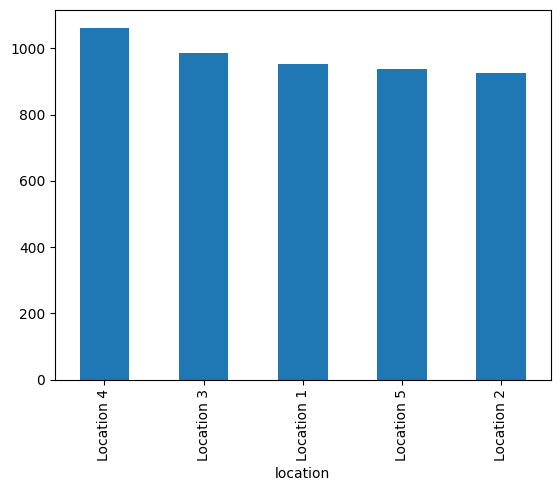

In [443]:
df.groupby('location')['time_spent'].count().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='location'>

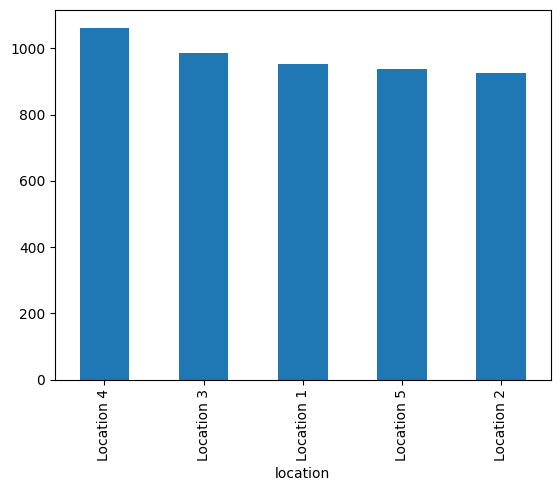

In [444]:
df.groupby('location')['pages_visited'].count().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='location'>

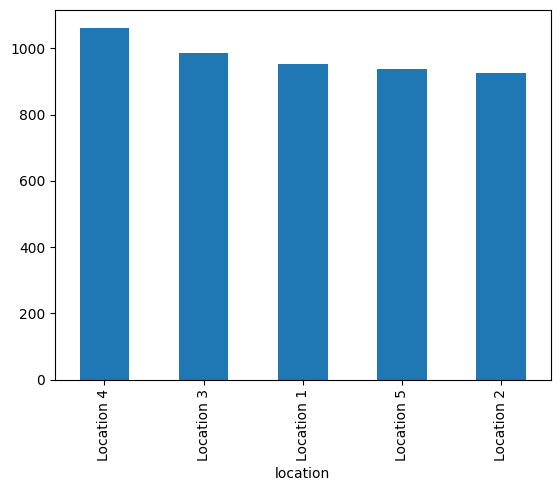

In [445]:
df.groupby('location')['cart_items'].count().sort_values(ascending=False).plot(kind='bar',)

<Axes: xlabel='location'>

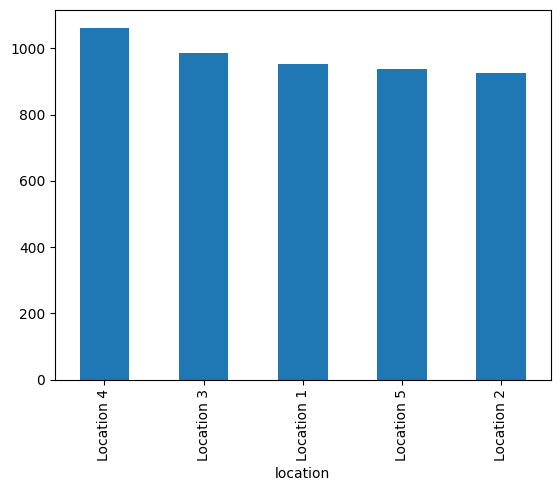

In [446]:
df.groupby('location')['cart_value'].count().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='location'>

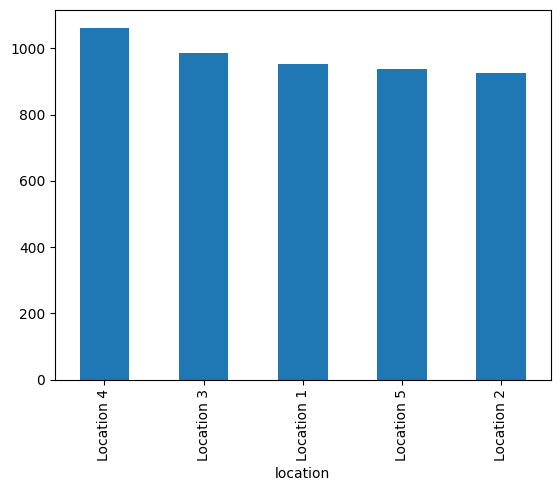

In [447]:
df.groupby('location')['cart_value'].count().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='location'>

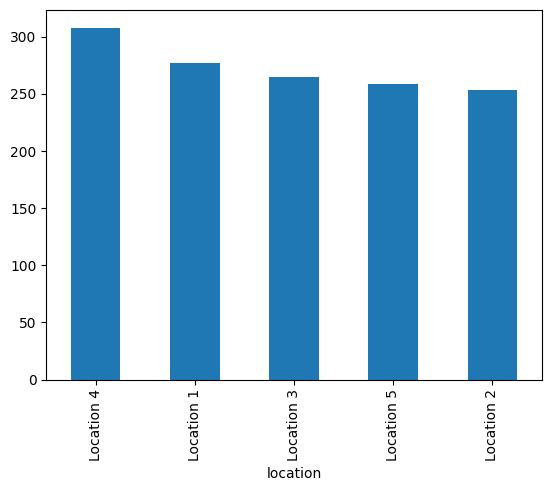

In [448]:
df[df['checkout_status'] == 1].groupby('location')['checkout_status'].count().sort_values(ascending=False).plot(kind='bar')

In [449]:
df[df['checkout_status'] == 1].groupby('location')['checkout_status'].count().sort_values(ascending=False).head()


location
Location 4    308
Location 1    277
Location 3    265
Location 5    259
Location 2    253
Name: checkout_status, dtype: int64

Based on those analysis, we find people in location 4 are highly to buy the product. In location 2 are less likely to by!

# let's do the experimentation
First, we are using location

In [450]:
df

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4993,4994,42,1,21.218768,5,13,120.59,0,Desktop,Location 5
4994,4995,33,4,29.762098,9,20,185.60,1,Desktop,Location 1
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4


In [451]:
loc_1 = df[df['location'] == 'Location 1']['time_spent']
loc_2 = df[df['location'] == 'Location 2']['time_spent']
loc_3 = df[df['location'] == 'Location 3']['time_spent']
loc_4 = df[df['location'] == 'Location 4']['time_spent']
loc_5 = df[df['location'] == 'Location 5']['time_spent']
p_val = stats.f_oneway(loc_1, loc_2, loc_3, loc_4, loc_5)
print(p_val)



F_onewayResult(statistic=1.0926352072395018, pvalue=0.35830592498941793)


No difference between them since high p-value

In [452]:
loc_1 = df[df['location'] == 'Location 1']['pages_visited']
loc_2 = df[df['location'] == 'Location 2']['pages_visited']
loc_3 = df[df['location'] == 'Location 3']['pages_visited']
loc_4 = df[df['location'] == 'Location 4']['pages_visited']
loc_5 = df[df['location'] == 'Location 5']['pages_visited']
p_val = stats.f_oneway(loc_1, loc_2, loc_3, loc_4, loc_5)
print(p_val)

F_onewayResult(statistic=0.5820512911958604, pvalue=0.6756529712923676)


In [453]:
loc_1 = df[df['location'] == 'Location 1']['cart_items']
loc_2 = df[df['location'] == 'Location 2']['cart_items']
loc_3 = df[df['location'] == 'Location 3']['cart_items']
loc_4 = df[df['location'] == 'Location 4']['cart_items']
loc_5 = df[df['location'] == 'Location 5']['cart_items']
p_val = stats.f_oneway(loc_1, loc_2, loc_3, loc_4, loc_5)
print(p_val)

F_onewayResult(statistic=0.7617852310639496, pvalue=0.5500221469162804)


In [454]:
loc_1 = df[df['location'] == 'Location 1']['checkout_status']
loc_2 = df[df['location'] == 'Location 2']['checkout_status']
loc_3 = df[df['location'] == 'Location 3']['checkout_status']
loc_4 = df[df['location'] == 'Location 4']['checkout_status']
loc_5 = df[df['location'] == 'Location 5']['checkout_status']
p_val = stats.f_oneway(loc_1, loc_2, loc_3, loc_4, loc_5)
print(p_val)

F_onewayResult(statistic=0.4838962577955464, pvalue=0.7476029214231963)


now, let's see the device

In [455]:
loc_1 = df[df['device'] == 'Desktop']['time_spent']
loc_2 = df[df['device'] == 'Mobile']['time_spent']
loc_3 = df[df['device'] == 'Tablet']['time_spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=2.319766054212819, pvalue=0.09840527628218267)


In [456]:
loc_1 = df[df['device'] == 'Desktop']['pages_visited']
loc_2 = df[df['device'] == 'Mobile']['pages_visited']
loc_3 = df[df['device'] == 'Tablet']['pages_visited']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=1.6731677823159898, pvalue=0.187759624117241)


In [457]:
loc_1 = df[df['device'] == 'Desktop']['cart_items']
loc_2 = df[df['device'] == 'Mobile']['cart_items']
loc_3 = df[df['device'] == 'Tablet']['cart_items']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.44854776914191, pvalue=0.6385812073014664)


In [458]:
loc_1 = df[df['device'] == 'Desktop']['cart_value']
loc_2 = df[df['device'] == 'Mobile']['cart_value']
loc_3 = df[df['device'] == 'Tablet']['cart_value']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.6120432094278636, pvalue=0.5422835605921454)


In [459]:
loc_1 = df[df['device'] == 'Desktop']['checkout_status']
loc_2 = df[df['device'] == 'Mobile']['checkout_status']
loc_3 = df[df['device'] == 'Tablet']['checkout_status']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=2.0854709184871547, pvalue=0.12435963391992207)


The users has no difference by each other by ANOVA test. 

In [460]:
df

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4993,4994,42,1,21.218768,5,13,120.59,0,Desktop,Location 5
4994,4995,33,4,29.762098,9,20,185.60,1,Desktop,Location 1
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4


In [461]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869,4869
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2559,1063
mean,2500.991579,41.567673,5.027316,24.654704,5.656603,14.963853,149.028308,0.279729,NaN,NaN
std,1440.884159,14.039129,2.594768,9.282836,2.479325,6.037707,67.816716,0.448912,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1257.000000,29.000000,3.000000,18.134064,4.000000,10.000000,92.370000,0.000000,NaN,NaN
50%,2499.000000,42.000000,5.000000,24.733236,6.000000,15.000000,143.820000,0.000000,NaN,NaN
75%,3749.000000,54.000000,7.000000,31.479631,7.000000,20.000000,198.040000,1.000000,NaN,NaN


In [462]:
# Create function to classify age
def total_cat(x):
    if x >= 0 and x < 20:
        return '0-20'
    elif x >= 20 and x < 50:
        return '20-50'
    else:
        return '50-100'
  

In [468]:
# Create function to classify value
def total_value(x):
    if x >= 0 and x < 50:
        return '0-50'
    elif x >= 50 and x < 200:
        return '50-200'
    else:
        return '200+'

In [475]:
# Create function to classify item
def total_value_1(x):
    if x >= 0 and x < 10:
        return '0-10'
    elif x >= 10 and x < 20:
        return '50-200'
    else:
        return '20+'

In [469]:
df['val'] = df['cart_value'].apply(total_value)

In [463]:
df['age_1'] = df['age'].apply(total_cat)

In [476]:
df['item'] = df['cart_items'].apply(total_value_1)

In [464]:
df.groupby('checkout_status')['age_1']

In [470]:
df

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,age_1,val
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1,50-100,50-200
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3,50-100,200+
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4,0-20,200+
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2,20-50,50-200
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4,20-50,50-200
...,...,...,...,...,...,...,...,...,...,...,...,...
4993,4994,42,1,21.218768,5,13,120.59,0,Desktop,Location 5,20-50,50-200
4994,4995,33,4,29.762098,9,20,185.60,1,Desktop,Location 1,20-50,50-200
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2,20-50,50-200
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4,20-50,50-200


In [466]:
grouped = df.groupby('age_1').agg({'cart_items': 'sum', 'checkout_status': lambda x: (x == 1).sum()})

In [467]:
grouped

,cart_items,checkout_status
age_1,,
0-20,3275,58
20-50,44736,845
50-100,24848,459


In [472]:
grouped = df.groupby('val').agg({'cart_items': 'sum', 'checkout_status': lambda x: (x == 1).sum()})
grouped

,cart_items,checkout_status
val,,
0-50,1078,3
200+,25594,161
50-200,46187,1198


In [477]:
grouped = df.groupby('item').agg({'cart_items': 'sum', 'checkout_status': lambda x: (x == 1).sum()})
grouped

,cart_items,checkout_status
item,,
0-10,8157,199
20+,31195,112
50-200,33507,1051


Based on the age, we find people age between 20-50 are buying more

1) Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?

2) How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.

3) What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).

# Q1
Based on your findings, it seems that customers from Region 4 and those using desktop devices are more likely to make purchases. Conversely, tablet users and customers from Region 2 exhibit lower purchasing activity. Additionally, individuals between the ages of 20 and 50 demonstrate a higher inclination towards making purchases. These insights indicate that directing marketing and sales efforts towards customers in Region 4, desktop users, and individuals aged 20-50 may yield more favorable outcomes.

Furthermore, it is interesting to note that customers in this target audience also have a preference for products priced between $50 and $200. Additionally, they tend to have items in their cart within the same price range. Considering these preferences, tailoring product offerings and marketing strategies to align with these price points could further enhance customer engagement and sales performance.

# Q2
Firstly, I removed any null values for device and location from the dataset. Next, I compared two methods: one for assigning the missing values to "other," and the other for assigning them to the most frequently occurring values. Afterward, I employed box plots to identify and remove outliers, completing the data cleaning process.

Subsequently, I performed statistical tests to examine the skewness and kurtosis of the data, which helped determine the data type. Additionally, I utilized an ANOVA test to analyze the relationship between customers using different devices and addresses. However, the analysis did not reveal any significant differences between these groups.
 

# Q3
It is advisable for companies to prioritize their focus on desktop users as they constitute a significant portion of their user base. While tablet users may represent a smaller segment, it is still important to cater to their needs. Additionally, paying attention to users from location 4 should be a priority as they are more likely to make purchases. Similarly, targeting users between the ages of 20-50, who are typically the primary consumers, should also be a key consideration